# Проект: исследовательский анализ данных Яндекс Афиши.

- Автор: Набойщикова Анастасия Дмитриевна
- Дата: 28.06.2025

# Цели и задачи проекта: 

Провести исследовательский анализ пользовательской активности на платформе Яндекс Афиши в период с 1 июня по 31 октября 2024 года, изучить сезонные изменения пользовательской активности и выручки от продаж билетов, выделить особенности осеннего периода, а также сравнить поведение пользователей мобильных и десктопных устройств.

# Описание данных:  

**Датасет <u>final_tickets_orders_df.csv</u> включает информацию обо всех заказах билетов, совершённых с двух типов устройств. Датасет содержит такие поля:**
- order_id — уникальный идентификатор заказа. 
- user_id — уникальный идентификатор пользователя. 
- created_dt_msk — дата создания заказа (московское время). 
- created_ts_msk — дата и время создания заказа (московское время). 
- event_id — идентификатор мероприятия из таблицы events. 
- cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'. 
- age_limit — возрастное ограничение мероприятия. 
- currency_code — валюта оплаты, например rub для российских рублей. 
- device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств,   а desktop для стационарных;  
- revenue — выручка от заказа. 
- service_name — название билетного оператора.
- tickets_count — количество купленных билетов.
- total — общая сумма заказа.  
- days_since_prev - количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.


**Датасет <u>final_tickets_events_df.csv</u> содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Датасет содержит такие поля:** 
- event_id — уникальный идентификатор мероприятия.
- event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- event_type_description — описание типа мероприятия.
- event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
- organizers — организаторы мероприятия.
- region_name — название региона.
- city_name — название города.
- city_id - уникальный идентификатор города.
- venue_id — уникальный идентификатор площадки.
- venue_name — название площадки.
- venue_address — адрес площадки.


**Датасет <u>final_tickets_tenge_df.csv</u> с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:** 
- nominal — номинал (100 тенге);
- data — дата;
- curs — курс тенге к рублю;
- cdx — обозначение валюты (kzt).


# Содержимое проекта:
- Загрузка данных и знакомство с данными;
- Предобработка данных и подготовка их к исследованию;
- Исследовательский анализ данных;
- Проверка гипотез;
- Общий вывод и рекомендации.

# 1. Загрузка данных и знакомство с ними

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [2]:
# Загружаем датасеты
orders = pd.read_csv('/datasets/final_tickets_orders_df.csv')
events = pd.read_csv('/datasets/final_tickets_events_df.csv')
tenge = pd.read_csv('/datasets/final_tickets_tenge_df.csv')

In [3]:
# Просмотр первых строк каждого датасета
print("Первые строки df_orders:")
display(orders.head())

print("\nПервые строки df_events:")
display(events.head())

print("\nПервые строки df_tenge:")
display(tenge.head())

Первые строки df_orders:


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0



Первые строки df_events:


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"



Первые строки df_tenge:


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [4]:
# Выводим информацию о каждом датасете
print("\nИнформация о датасете df_orders:")
orders.info()

print("\nИнформация о датасете df_events:")
events.info()

print("\nИнформация о датасете df_tenge:")
tenge.info()


Информация о датасете df_orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes:

__<u>Первичные выводы после загрузки и знакомства с данными:</u>__  

<u>Информация о датасете orders_df:</u>    
Размер: 290 849 строк, 14 столбцов, 31.1+ MB.  
Типы данных: Столбцы с датами (created_dt_msk, created_ts_msk) представлены как object (строки) — потребуется   преобразование в datetime.  

<u>Информация о датасете events_df:</u>  
Размер: 22 427 строк, 11 столбцов, 1.9+ MB.  
Типы данных: Все данные корректны по типам.     

<u>Информация о датасете tenge_df:</u>  
Размер: 357 строк, 4 столбца, 11.3+ KB.   
Типы данных: Дата в столбце data — строка, её нужно привести к datetime для корректной работы с датами.  


# 2. Предобработка данных и подготовка их к исследованию

__<u> 2.1  Приведем преобразование типов данных, приведем названия колонок к snake_case (на всякий случай) и создадим столбец с датой для дальнейшего объединения с курсами валют.</u>__

In [5]:
# Преобразуем даты
orders['created_dt_msk'] = pd.to_datetime(orders['created_dt_msk'])
orders['created_ts_msk'] = pd.to_datetime(orders['created_ts_msk'])
tenge['data'] = pd.to_datetime(tenge['data'])

# Создадим отдельный столбец с датой для объединения с курсами валют
orders['date'] = orders['created_dt_msk'].dt.normalize() 
tenge['date'] = tenge['data'].dt.normalize()

# Преобразуем названия всех колонок к нижнему регистру и заменяем пробелы на подчёркивания
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
events.columns = events.columns.str.lower().str.replace(' ', '_')
tenge.columns = tenge.columns.str.lower().str.replace(' ', '_')

__Из первичной просмотра мы видели что даты находятся в неправильном формате. Теперь все исправлено и подготовлено для объединения датафреймов.__

__<u> 2.2  Объединяем данные в один датафрейм.</u>__

In [6]:
# Объединяем orders с events по event_id
df = orders.merge(events, on='event_id', how='left')

# Объединяем полученный df с курсом тенге по дате
df = df.merge(tenge[['date', 'curs','nominal']], on='date', how='left')

# Проверяем результат
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290849 non-null  int64         
 1   user_id                 290849 non-null  object        
 2   created_dt_msk          290849 non-null  datetime64[ns]
 3   created_ts_msk          290849 non-null  datetime64[ns]
 4   event_id                290849 non-null  int64         
 5   cinema_circuit          290849 non-null  object        
 6   age_limit               290849 non-null  int64         
 7   currency_code           290849 non-null  object        
 8   device_type_canonical   290849 non-null  object        
 9   revenue                 290849 non-null  float64       
 10  service_name            290849 non-null  object        
 11  tickets_count           290849 non-null  int64         
 12  total                   290849

__Датафреймы объединились корректно. Чило столбцов и строк корректно.__

 __<u> 2.3 Работаем с валютой и расчитывем выручку в рублях.</u>__

In [7]:
# Создаём колонку revenue_rub — по умолчанию равна revenue
df['revenue_rub'] = df['revenue']

# Добавляем месяц и сезон
df['month'] = df['created_dt_msk'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

df['season'] = df['month'].apply(get_season)

# Для валюты 'kzt' пересчитываем в рубли по курсу
df.loc[df['currency_code'] == 'kzt', 'revenue_rub'] = \
    df['revenue'] * df['curs'] / df['nominal']

# Выводим первые строки для проверки как прошла конвертация валюты
print(df[['currency_code', 'revenue', 'curs', 'revenue_rub']].head())
# посмотрим как добавились столбцы month, season 
display(df.info())

  currency_code  revenue     curs  revenue_rub
0           rub  1521.94  18.6972      1521.94
1           rub   289.45  18.3419       289.45
2           rub  1258.57  19.6475      1258.57
3           rub     8.49  18.5010         8.49
4           rub  1390.41  19.6648      1390.41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290849 non-null  int64         
 1   user_id                 290849 non-null  object        
 2   created_dt_msk          290849 non-null  datetime64[ns]
 3   created_ts_msk          290849 non-null  datetime64[ns]
 4   event_id                290849 non-null  int64         
 5   cinema_circuit          290849 non-null  object        
 6   age_limit               290849 non-null  int64         
 7   currency_code           290849 non-null  object      

None

__В колонке revenue_rub корректно сохранена выручка в рублях. Для заказов в тенге (currency_code == 'kzt') значение пересчитано по курсу (curs), разделённому на 100, чтобы учесть копейки. Для рублёвых заказов значение осталось без изменений.__

__<u> 2.4  Проверяем данные на пропуски.</u>__

In [8]:
# Пропуски
missing = df.isna().sum()
print("Пропуски:\n", missing[missing > 0])

Пропуски:
 days_since_prev           21940
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
dtype: int64


Пропуски присутствуют в колонке days_since_prev, но это нормально, так как данные в этом столбце должны содержать пропуски. А вот остальные мы удалим так как их незначительное количество.

In [9]:
# Убираем строки с пропусками в остальных столбцах
df.dropna(subset=[
    'event_name','event_type_description', 'event_type_main', 
    'organizers', 'region_name', 'city_name', 'city_id', 
    'venue_id','venue_name', 'venue_address'
], inplace=True)

In [10]:
# Заполняем пропуски в days_since_prev — нет предыдущего заказа нулями
df['days_since_prev'] = df['days_since_prev'].fillna(0)

In [11]:
# Еще раз проверим пропуски
print("Пропуски после обработки:\n", df.isnull().sum()[df.isnull().any()])

Пропуски после обработки:
 Series([], dtype: int64)


__<u>В этом шаге избавились от пропусков:<u>__  
- путем замены пропусков а столбце days_since_prev на 0 потому что пропуски означают отсутствие предыдущих заказов, следовательно, промежуток между заказами считается равным нулю;
- в остальных столбцах удалили строки с пропусками так как их незначительное количество.


__<n> 2.4  Изучаем значения в ключевых столбцах.</n>__

__<n> 2.4.1  Нормализация категориальных значений и проверка.</n>__

In [12]:
# Выделим и проверим категориальные значения
cat_cols = ['cinema_circuit','device_type_canonical', 'currency_code', 'age_limit', 'event_type_main','service_name','event_type_description', 'region_name', 'city_name']

for col in cat_cols:
    print(f"\n{col}: {df[col].nunique()} уникальных значений")
    print(df[col].value_counts(dropna=False).head(10))

# Проверим категории (например, 'не указано', 'NA', '-', пустые строки)
for col in cat_cols:
    print(f"\nПодозрительные значения в {col}:")
    print(df[df[col].isin(['-', 'не указано', 'NA', '', None])][col].value_counts())


cinema_circuit: 6 уникальных значений
нет           289213
Другое          1261
КиноСити         122
Киномакс           7
Москино            7
ЦентрФильм         1
Name: cinema_circuit, dtype: int64

device_type_canonical: 2 уникальных значений
mobile     232490
desktop     58121
Name: device_type_canonical, dtype: int64

currency_code: 2 уникальных значений
rub    285542
kzt      5069
Name: currency_code, dtype: int64

age_limit: 5 уникальных значений
16    78556
12    62474
0     61487
6     52161
18    35933
Name: age_limit, dtype: int64

event_type_main: 7 уникальных значений
концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
выставки      4854
ёлки          1989
Name: event_type_main, dtype: int64

service_name: 36 уникальных значений
Билеты без проблем    63519
Лови билет!           41124
Билеты в руки         40343
Мой билет             34839
Облачко               26642
Лучшие билеты         17774
Весь в билетах        16849
Прачечная

__Аномалий не выявлено. Все данные в порядке.__

__<n> 2.4.2  Нормализация для количественных значений.</n>__

In [13]:
# Отдельные датасеты по валюте
rub_orders = df[df['currency_code'] == 'rub'].copy()
kzt_orders = df[df['currency_code'] == 'kzt'].copy()

In [14]:
print(" RUB (рубли):")
print(rub_orders['revenue'].describe())

print("\n KZT (тенге):")
print(kzt_orders['revenue'].describe())

print("\n Tickets count:")
print(df['tickets_count'].describe())

 RUB (рубли):
count    285542.000000
mean        548.013929
std         871.750181
min         -90.760000
25%         114.170000
50%         346.630000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

 KZT (тенге):
count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

 Tickets count:
count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64


__<n>Выручка по заказам в рублях</n>: есть отрицательные значения и очень большой разброс, стоит удалить выбросы (обрезать по 99-му перцентилю).__  

__<n>Выручка по заказам в тенге:</n> смотрится нормально.__  

__<n>Количество билетов в заказе:</n> большинство заказов — от 2 до 4 билетов, но максимум 57 — это явный выброс, его можно ограничить по 99-му перцентилю.__

In [15]:
rub_p99 = rub_orders['revenue'].quantile(0.99)
kzt_p99 = kzt_orders['revenue'].quantile(0.99)

print(f"\n 99-й перцентиль (RUB): {rub_p99:.2f}")
print(f" 99-й перцентиль (KZT): {kzt_p99:.2f}")


 99-й перцентиль (RUB): 2570.80
 99-й перцентиль (KZT): 17617.24


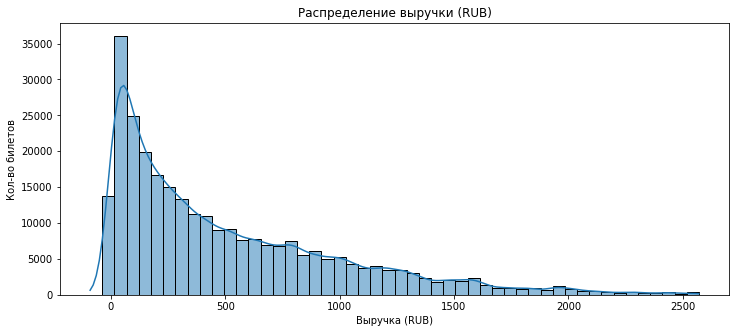

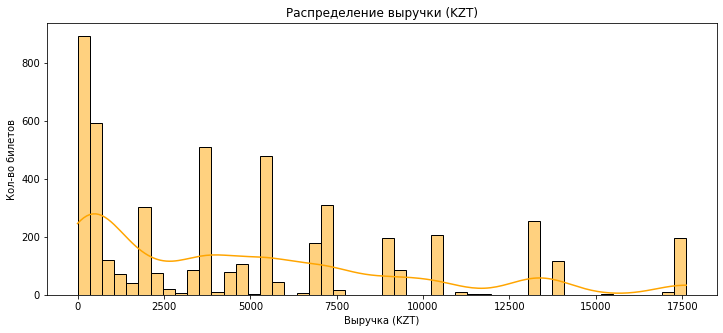

In [16]:
rub_filtered = rub_orders[rub_orders['revenue'] <= rub_p99]
kzt_filtered = kzt_orders[kzt_orders['revenue'] <= kzt_p99]

# Выручка в рублях
plt.figure(figsize=(12,5))
sns.histplot(rub_filtered['revenue'], bins=50, kde=True)
plt.title('Распределение выручки (RUB)')
plt.xlabel('Выручка (RUB)')
plt.ylabel('Кол-во билетов')
plt.show()

# Выручка в тенге
plt.figure(figsize=(12,5))
sns.histplot(kzt_filtered['revenue'], bins=50, kde=True, color='orange')
plt.title('Распределение выручки (KZT)')
plt.xlabel('Выручка (KZT)')
plt.ylabel('Кол-во билетов')
plt.show()

In [17]:
# Объединяем очищенные данные обратно в общий датасет
filtered_data = pd.concat([rub_filtered, kzt_filtered]).sort_values('order_id').reset_index(drop=True)

# Замещаем исходный датасет df новыми чистыми данными
df = filtered_data.copy()

# Проверяем, сколько строк осталось после фильтрации
print(f"Число строк после фильтрации: {len(df)}")

Число строк после фильтрации: 287782


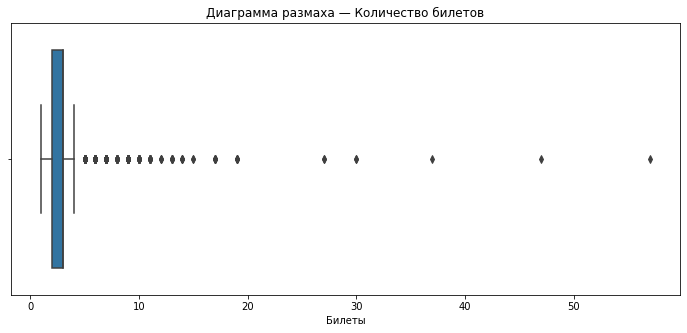

In [18]:
# Кол-во билетов
plt.figure(figsize=(12,5))
sns.boxplot(x=df['tickets_count'])
plt.title('Диаграмма размаха — Количество билетов')
plt.xlabel('Билеты')
plt.show()

__<n> Распределение выручки (RUB).</n>__  

- сильный правосторонний перекос;
- основная масса заказов находится в диапазоне до 1000 рублей.

__<n> Распределение выручки (KZT).</n>__  

- аналогично рублям, распределение с перекосом вправо;
- основная масса значений — до 10 000 тенге;
- есть пики, возможно связанные с типовыми ценами на мероприятия.


__<n>Количество билетов.</n>__  

- диаграмма размаха (boxplot) чётко показывает выбросы:
- большинство заказов — от 2 до 4 билетов.




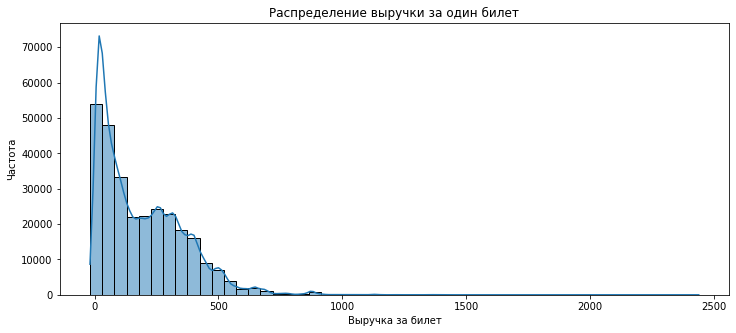

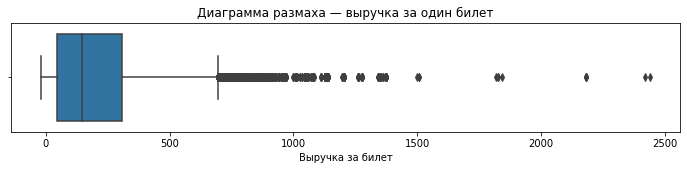

In [19]:
# Рассчитаем выручку за один билет
df['one_ticket_revenue_rub'] = df['revenue_rub'] / df['tickets_count']

# Построим гистограмму распределения
plt.figure(figsize=(12, 5))
sns.histplot(df['one_ticket_revenue_rub'], bins=50, kde=True)
plt.title('Распределение выручки за один билет')
plt.xlabel('Выручка за билет')
plt.ylabel('Частота')
plt.show()

# Построим диаграмму размаха (boxplot)
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['one_ticket_revenue_rub'])
plt.title('Диаграмма размаха — выручка за один билет')
plt.xlabel('Выручка за билет')
plt.show()

__Выручка за один билет: распределение асимметричное (с правым "хвостом") — большинство значений сосредоточены до 500 рублей, но есть значения и до 2500 ₽.
Основная масса значений сосредоточена в диапазоне от 0 до 500 ₽, с пиком на ~50–100 ₽, что говорит о дешёвых билетах как самой распространённой категории.__

__<n> 2.5  Проверьте явные и неявные дубликаты.</n>__

In [20]:
# Количество полных дубликатов
print("Полных дубликатов:", df.duplicated().sum())

Полных дубликатов: 0


In [21]:
cols_no_order_id = df.columns.drop('order_id')
duplicates_mask = df.duplicated(subset=cols_no_order_id)
print("Неявных дубликатов (без учёта order_id):", duplicates_mask.sum())

# Удаление неявных дубликатов
df = df.drop_duplicates(subset=cols_no_order_id)

Неявных дубликатов (без учёта order_id): 31


__Обнаружены неявные дубликаты, удалили их потому что их мало и их удаление ни на что не повлияют.__

# Общий вывод по данным.



__Было сделано:__

- Были загружены исходные наборы данных, произведено ознакомление с их структурой и содержимым.
- Приведение временных переменных к правильному типу данных (`datetime`).
- Создание дополнительной временной колонки для последующего объединения наборов данных.
- Объединение трех датасетов путем left join для сохранения всей необходимой информации.
- Расчет выручки в единой валюте (рублях) с учетом курса обмена тенге.
- Обработка пропущенных значений, удаление малозначимых пропусков и заполнение отсутствующих интервалов между предыдущими покупками нулевыми значениями.
- Анализ распределений выручки и количества билетов в заказе, выявление выбросов и фильтрация по верхним квантильным границам.
- Корректировка структуры данных, включая создание новых аналитически значимых признаков (таких как выручка за один билет, месячные периоды и сезоны).
- Данные подготовлены для дальнейшего анализа данных

# 3. Исследовательский анализ данных

__3.1. Анализ распределения заказов по сегментам и их сезонные изменения__

__3.1.1 Для каждого месяца найдите количество заказов__


   month  num_orders
0      6       34164
1      7       40407
2      8       44550
3      9       69351
4     10       99279


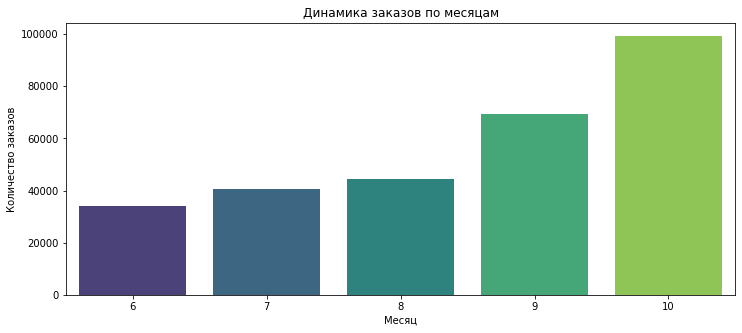

In [22]:
# Подсчет количества заказов по месяцам
monthly_orders = df.groupby('month').size().reset_index(name='num_orders')

print(monthly_orders)

# Отображение графика динамики заказов по месяцам
plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_orders, x='month', y='num_orders', palette="viridis")
plt.title('Динамика заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.show()

Видим, что в октябре было сделано больше всего заказов. Видим увеличение заказов от июня к октябрю.

__3.1.2 Для осеннего и летнего периодов сравним распределение заказов билетов по типу мероприятия, по типу устройств и по возрастным ограничениям__


Доли летних заказов:


выставки     2.03%
другое      27.17%
концерты    42.62%
спорт        2.52%
стендап      5.33%
театр        20.1%
ёлки         0.23%
Name: event_type_main, dtype: object


Доли осенних заказов:


выставки     1.44%
другое       19.7%
концерты    37.21%
спорт        11.2%
стендап      4.11%
театр       25.34%
ёлки          1.0%
Name: event_type_main, dtype: object

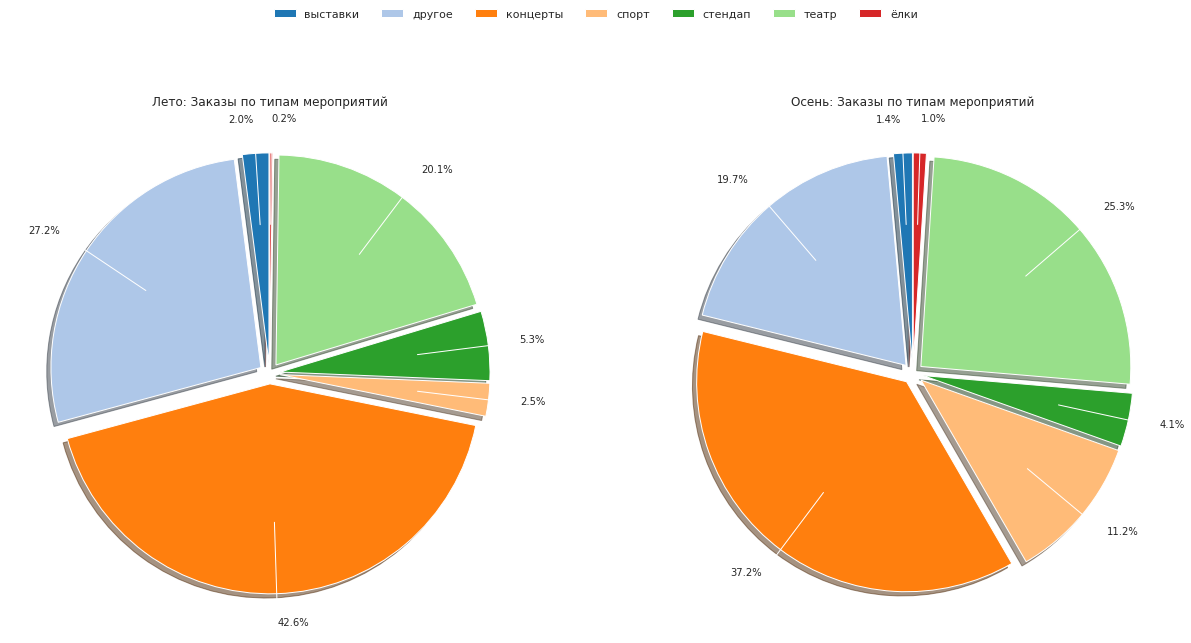

In [23]:
sns.set(style="whitegrid")

summer_months = [6, 7, 8]
autumn_months = [9, 10, 11]

df_summer = df.query('month in @summer_months')
df_autumn = df.query('month in @autumn_months')

def calculate_share(series):
    return series.value_counts(normalize=True).sort_index()

summer_shares = calculate_share(df_summer['event_type_main'])
autumn_shares = calculate_share(df_autumn['event_type_main'])

# Вывод таблиц с долями
print("Доли летних заказов:")
display((summer_shares * 100).round(2).astype(str) + '%')

print("\nДоли осенних заказов:")
display((autumn_shares * 100).round(2).astype(str) + '%')

# Подготовка данных для графика
labels = summer_shares.index.tolist()
colors = plt.get_cmap('tab20').colors[:len(labels)]
explode = [0.05] * len(labels)

# Функция для подписей процентов снаружи
def autopct_outside(pcts, wedges, ax):
    for pct, wedge in zip(pcts, wedges):
        ang = (wedge.theta2 + wedge.theta1) / 2.
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))
        ha = 'left' if x > 0 else 'right'
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        ax.annotate(f'{pct:.1f}%',
                    xy=(x*0.7, y*0.7),
                    xytext=(x*1.2, y*1.2),
                    ha=ha,
                    arrowprops=dict(arrowstyle='-', connectionstyle=connectionstyle),
                    fontsize=10)

# Строим графики по типу мероприятия
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

wedges1, _ = axs[0].pie(
    summer_shares,
    colors=colors,
    explode=explode,
    startangle=90,
    shadow=True,
    labels=None,
    normalize=False  # добавляем normalize=False
)
axs[0].set_title('Лето: Заказы по типам мероприятий')
autopct_outside(summer_shares * 100, wedges1, axs[0])

wedges2, _ = axs[1].pie(
    autumn_shares,
    colors=colors,
    explode=explode,
    startangle=90,
    shadow=True,
    labels=None,
    normalize=False  # добавляем normalize=False
)
axs[1].set_title('Осень: Заказы по типам мероприятий')
autopct_outside(autumn_shares * 100, wedges2, axs[1])

fig.legend(handles=wedges1, labels=labels, loc='upper center', ncol=len(labels), frameon=False, fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

Доли летних заказов:


desktop    19.36%
mobile     80.64%
Name: device_type_canonical, dtype: object


Доли осенних заказов:


desktop    20.34%
mobile     79.66%
Name: device_type_canonical, dtype: object

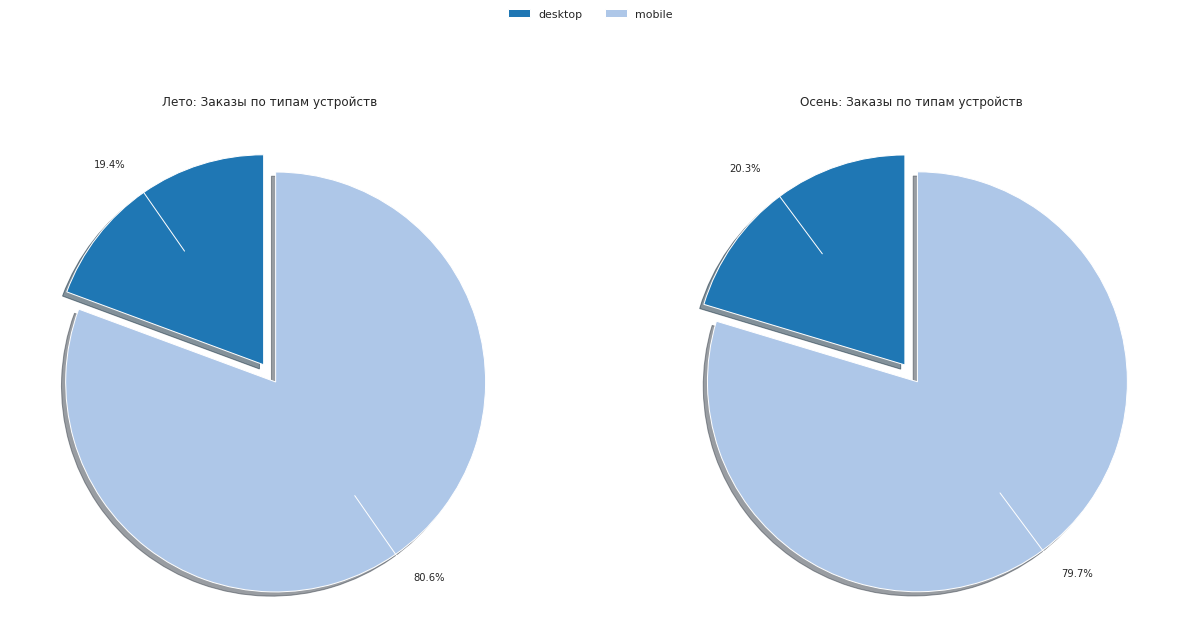

In [24]:
# Расчет долей по типам устройств
summer_shares_dev = calculate_share(df_summer['device_type_canonical'])
autumn_shares_dev = calculate_share(df_autumn['device_type_canonical'])

#  Вывод таблиц с долями
print("Доли летних заказов:")
display((summer_shares_dev * 100).round(2).astype(str) + '%')

print("\nДоли осенних заказов:")
display((autumn_shares_dev * 100).round(2).astype(str) + '%')

# Подготовка к построению графиков
labels_dev = summer_shares_dev.index.tolist()
colors_dev = plt.get_cmap('tab20').colors[:len(labels_dev)]
explode_dev = [0.05] * len(labels_dev)

# Строим графики по типам устройств
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

wedges1, _ = axs[0].pie(
    summer_shares_dev,
    colors=colors_dev,
    explode=explode_dev,
    startangle=90,
    shadow=True,
    labels=None
)
axs[0].set_title('Лето: Заказы по типам устройств')
autopct_outside(summer_shares_dev * 100, wedges1, axs[0])

wedges2, _ = axs[1].pie(
    autumn_shares_dev,
    colors=colors_dev,
    explode=explode_dev,
    startangle=90,
    shadow=True,
    labels=None
)
axs[1].set_title('Осень: Заказы по типам устройств')
autopct_outside(autumn_shares_dev * 100, wedges2, axs[1])

fig.legend(
    handles=wedges1,
    labels=labels_dev,
    loc='upper center',
    ncol=len(labels_dev),
    frameon=False,
    fontsize=11
)

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

Доли летних заказов:


0     17.97%
6     18.19%
12    20.54%
16    28.34%
18    14.96%
Name: age_limit, dtype: object


Доли осенних заказов:


0     23.62%
6     17.62%
12     22.1%
16    26.22%
18    10.44%
Name: age_limit, dtype: object

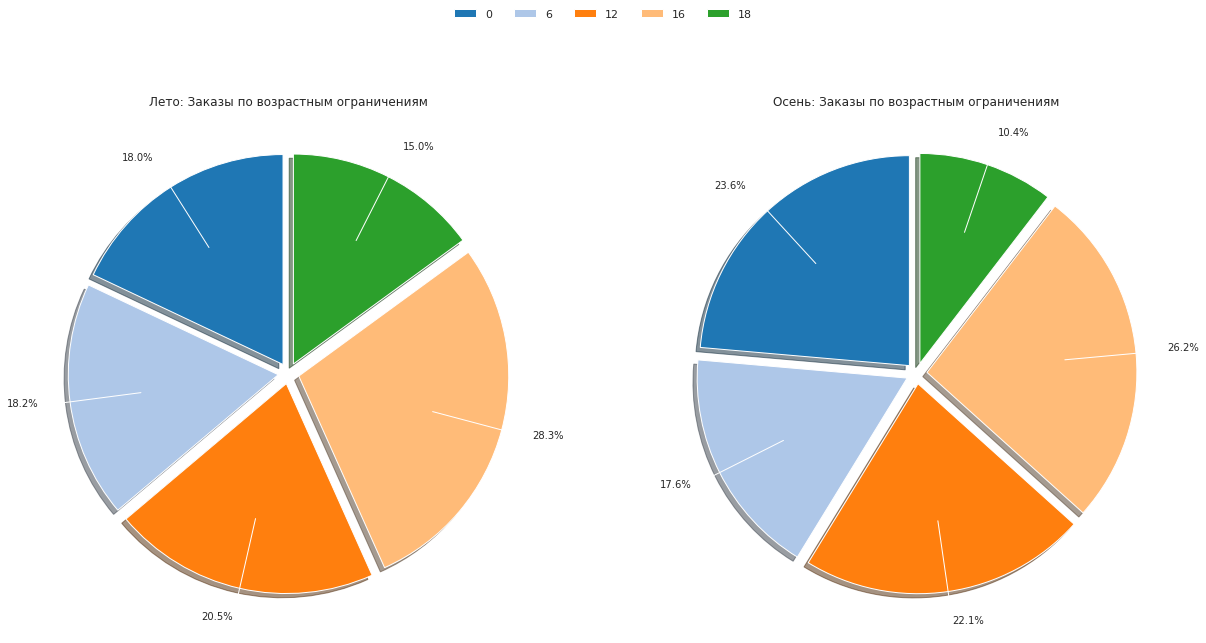

In [25]:
# Расчет долей по возрастным ограничениям
summer_shares_age = calculate_share(df_summer['age_limit'])
autumn_shares_age = calculate_share(df_autumn['age_limit'])

# Вывод таблиц с долями
print("Доли летних заказов:")
display((summer_shares_age * 100).round(2).astype(str) + '%')

print("\nДоли осенних заказов:")
display((autumn_shares_age * 100).round(2).astype(str) + '%')

# Подготовка к построению графиков
labels_age = summer_shares_age.index.tolist()
colors_age = plt.get_cmap('tab20').colors[:len(labels_age)]
explode_age = [0.05] * len(labels_age)

# Строим графики по возрастным ограничениям
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

wedges1, _ = axs[0].pie(
    summer_shares_age,
    colors=colors_age,
    explode=explode_age,
    startangle=90,
    shadow=True,
    labels=None,
    normalize=False  # Добавлена нормализации
)
axs[0].set_title('Лето: Заказы по возрастным ограничениям')
autopct_outside(summer_shares_age * 100, wedges1, axs[0])

wedges2, _ = axs[1].pie(
    autumn_shares_age,
    colors=colors_age,
    explode=explode_age,
    startangle=90,
    shadow=True,
    labels=None,
    normalize=False  # Добавлена нормализация
)
axs[1].set_title('Осень: Заказы по возрастным ограничениям')
autopct_outside(autumn_shares_age * 100, wedges2, axs[1])

fig.legend(
    handles=wedges1,
    labels=labels_age,
    loc='upper center',
    ncol=len(labels_age),
    frameon=False,
    fontsize=11
)

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

__Тип мероприятия:__ И летом, и оченью лидируют концерты.  
__Тип устройства:__ Оба сезона показывают доминирующее использование мобильных устройств, однако осенью чуть больший процент пользователей предпочитает совершать покупки с настольных компьютеров.  
__Возрастное ограничение:__ И летом и осенью мероприятия проходят с разными возрастными ограничениями, но немного лидируют мероприятия с возрастным ограничением 16+

__3.1.3 Изучаем изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью__

In [26]:
# Средние значения выручки с одного билета по каждому типу мероприятия летом и осенью
summer_avg = df.query('month in @summer_months').groupby('event_type_main')['one_ticket_revenue_rub'].mean()
autumn_avg = df.query('month in @autumn_months').groupby('event_type_main')['one_ticket_revenue_rub'].mean()

print(" Летом:")
print(summer_avg )


print(" Осенью:")
print(autumn_avg)

 Летом:
event_type_main
выставки     86.416198
другое       77.433968
концерты    304.790309
спорт        50.761831
стендап     218.518107
театр       214.138855
ёлки        271.436176
Name: one_ticket_revenue_rub, dtype: float64
 Осенью:
event_type_main
выставки     90.603610
другое       76.115334
концерты    268.358737
спорт        49.969733
стендап     231.124973
театр       175.973442
ёлки        229.585589
Name: one_ticket_revenue_rub, dtype: float64


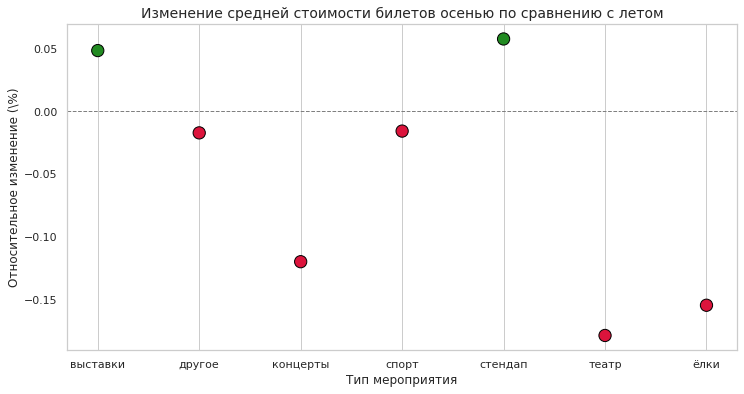

In [27]:
# Относительное изменение средней стоимости билетов
change_percentage = (autumn_avg / summer_avg) - 1

# Настройки оформления графика
plt.figure(figsize=(12, 6))

# Выбор цветовой схемы в зависимости от знака изменения
colors = change_percentage.map(lambda x: 'forestgreen' if x >= 0 else 'crimson')

# Точечная диаграмма
plt.scatter(change_percentage.index, change_percentage.values, s=150, c=colors, edgecolors='black')

# Нанесем горизонтальную линию уровня 0%, чтобы отделять рост от снижения
plt.axhline(y=0, color='gray', linestyle='--', lw=1)

# Оформление графика
plt.title('Изменение средней стоимости билетов осенью по сравнению с летом', fontsize=14)
plt.xlabel('Тип мероприятия', fontsize=12)
plt.ylabel('Относительное изменение (\%)', fontsize=12)

# Сетка и оформление осей
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Показываем график
plt.show()

__Общий вывод:__ 

- Основное сокращение средней стоимости осенью произошло в следующих категориях: театральные мероприятия, ёлки и концерты. 
- Повышение стоимости наблюдалось в стендап-шоу и выставках.
- Спортивные мероприятия остаются стабильными, с небольшим понижением, что подтверждает стабильность спроса на подобные мероприятия. 

Такие наблюдения полезны для организаторов мероприятий, которые смогут скорректировать стратегию маркетинга и ценообразования, учитывая сезонные колебания интереса аудитории.

__Вывод:__

__по заказам:__
- __концерты:__ 
    - самая популярная категории летом и осенью, но по сравнению с осенью заинтересованность концертами немного падает. Возможно это связано с окончанием летних музыкальных фестивалей.
    - средняя стоимость билетов падает.
- __театры:__   
    - по сравнению с летом осенью доля заказов растет. Это может быть связано с тем, что осенью театры часто ставят новые постановки и разрабатывают афиши. Осень знаменует начало нового театрального сезона после летнего перерыва.
    - средняя стоимость билетов падает.
- __спорт:__  
    - также набирает активность осенью. Самый популярный вид спортивного мероприятия -футбол. А в футболе национальные чемпионаты, кубки и европейские турниры обычно проходят по системе «осень — весна».
    - средняя стоимость билетов падает.
- __елки:__  
    - осенью показатель больше чем летом по понятным причинам-приближается новый год и все задумываются о покупке билетов.
    - средняя стоимость билетов падает.
- __выставки:__ 
    - осенью показатель меньше, чем летом. Возможно, это связано с туристическим летним периудом.
    - средняя стоимость билетов растет.
- __стендап:__ 
    - в летний период показатель выше, чем осенью. Возможно лето больше ассоциирцется с весельем, что может способствовать большему интересу к развлекательным мероприятиям, таким как стендап.
    - средняя стоимость билетов растет.
- __другое:__  
    - летом показатель выше, чем осенью. Возможно это связано с хорошей погодой, большей возможностью проведения разных мероприятий и соответсвенно желанием попробовать что-нибудь новое.
    - средняя стоимость билетов падает.

 __3.2. Осенняя активность пользователей__
    
    

__3.2.1 Динамика изменений по дням для общего числа заказов,количества активных пользователей DAU,среднего числа заказов на одного пользователя и средней стоимости одного билета.__

In [28]:
# Выделяем сентябрь и октябрь 2024
autumn_months = [9, 10]
df_autumn = df.query('month in @autumn_months').copy()

# Группируем по дням
daily_stats = df_autumn.groupby('date').agg(
    num_orders = ('order_id', 'count'),           # Общее число заказов
    dau = ('user_id', 'nunique'),                  # Количество уникальных пользователей (DAU)
    avg_ticket_price = ('one_ticket_revenue_rub', 'mean')  # Средняя стоимость одного билета
).reset_index()

# Рассчитываем среднее число заказов на одного пользователя
daily_stats['orders_per_user'] = daily_stats['num_orders'] / daily_stats['dau']

daily_stats.head()


,date,num_orders,dau,avg_ticket_price,orders_per_user
0,2024-09-01,1327,564,200.168708,2.352837
1,2024-09-02,1380,574,189.464639,2.404181
2,2024-09-03,5113,778,80.350151,6.571979
3,2024-09-04,1773,686,178.048069,2.584548
4,2024-09-05,1944,739,189.510156,2.630582


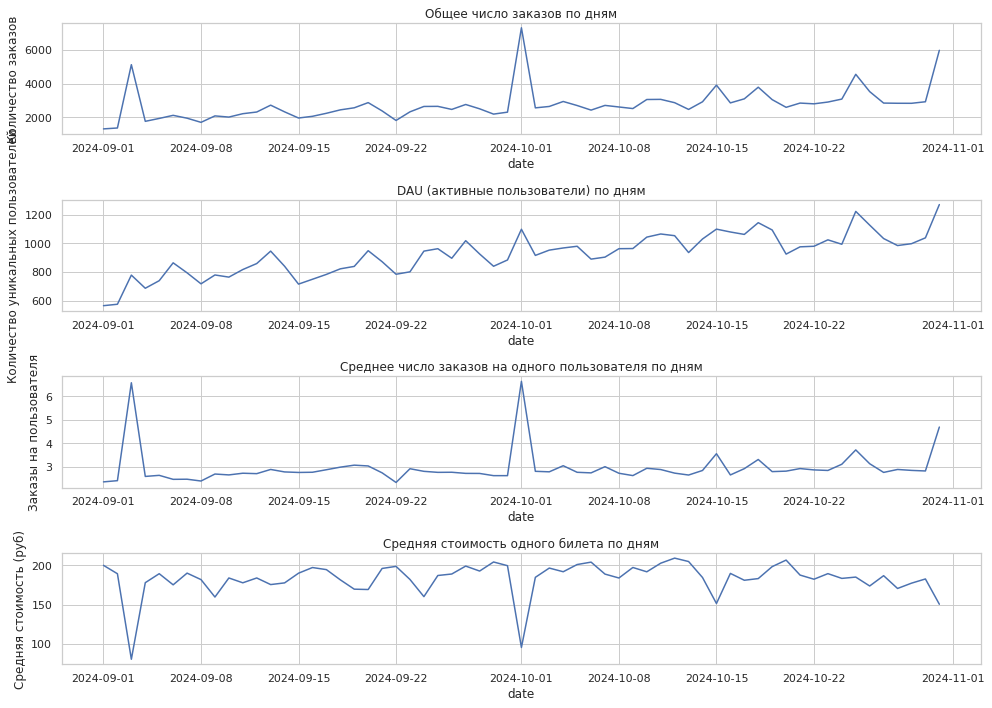

In [29]:
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
sns.lineplot(data=daily_stats, x='date', y='num_orders')
plt.title('Общее число заказов по дням')
plt.ylabel('Количество заказов')

plt.subplot(4, 1, 2)
sns.lineplot(data=daily_stats, x='date', y='dau')
plt.title('DAU (активные пользователи) по дням')
plt.ylabel('Количество уникальных пользователей')

plt.subplot(4, 1, 3)
sns.lineplot(data=daily_stats, x='date', y='orders_per_user')
plt.title('Среднее число заказов на одного пользователя по дням')
plt.ylabel('Заказы на пользователя')

plt.subplot(4, 1, 4)
sns.lineplot(data=daily_stats, x='date', y='avg_ticket_price')
plt.title('Средняя стоимость одного билета по дням')
plt.ylabel('Средняя стоимость (руб)')

plt.tight_layout()
plt.show()


__Вывод:__


__Общее число заказов:__
- видим резкий скачок 3 сентября. Это может быть связано с началом учебного года у школьников и студентов и желанием родителей их подбодрить.

__Количество активных пользователей (DAU):__
- аналогично заказам наблюдается скачок и  дальнейший рост показателей с сентября. Возможно это связано с тем, что люди вернулись из отпусков после лета и теперь заинтересованы в посещении всякого рода мероприятий.

__Среднее число заказов на одного пользователя (orders_per_user):__
- опять наблюдается скачок в сентябре. Если мы посмотрим на график со средней стоимостью билета, то увидим что как раз в эти числа, когда происходит рост числа заказов - падает средняя стоимость билета.  

__Средняя стоимость одного билета (avg_ticket_price):__
- наблюдается зависимость между средней стоимостью заказов и средним числом заказов. Возможно проходят какие-то акции (например в сентябре это может быть связано с началом учебного периода, чтобы привлечь семьи с детьми.

__3.2.2 Недельную цикличность. Выделим день недели и сравним пользовательскую активность в будни и выходные.__

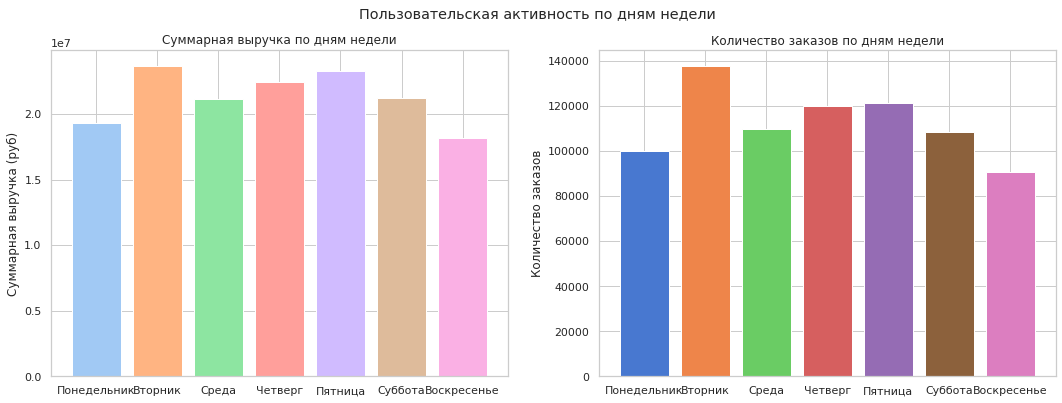

In [30]:
# Преобразуем дату в удобный формат и извлекаем день недели где 0 это понедельник
df['weekday'] = df['created_dt_msk'].dt.weekday  

# Суммарная выручка и количество заказов по дням недели
weekly_activity = df.groupby('weekday')[['revenue_rub', 'tickets_count']].agg({
    'revenue_rub': ['sum', 'mean'],
    'tickets_count': ['sum', 'mean']
}).reset_index()

# Названия дней недели для лучшей наглядности
weekdays_map = {0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', 4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'}
weekly_activity['weekday'] = weekly_activity['weekday'].map(weekdays_map)

# Зададим правильный порядок дней недели
ordered_days = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]
weekly_activity['weekday'] = pd.Categorical(weekly_activity['weekday'], categories=ordered_days, ordered=True)

# Сортировка по правильному порядку дней
weekly_activity.sort_values(by='weekday', inplace=True)

# Визуализация динамики выручки и количества заказов по дням недели
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# График суммарной выручки
axs[0].bar(weekly_activity['weekday'], weekly_activity['revenue_rub']['sum'], color=sns.color_palette("pastel"))
axs[0].set_title('Суммарная выручка по дням недели')
axs[0].set_ylabel('Суммарная выручка (руб)')

# График количества заказов
axs[1].bar(weekly_activity['weekday'], weekly_activity['tickets_count']['sum'], color=sns.color_palette("muted"))
axs[1].set_title('Количество заказов по дням недели')
axs[1].set_ylabel('Количество заказов')

plt.suptitle('Пользовательская активность по дням недели')
plt.show()

__Из графика видно:__  

- распределение выручки довольно равномерно, но пик приходится на вторник, четверг и пятницу.Это может быть связано с тем, что пользователи чаще покупают билеты в середине недели, планируя мероприятия на выходные. А низкие показатели в выходные указывают на то,что люди отдыхают в эти дни (как раз на мероприятиях на которые приобрели билеты на неделе), а понедельник - первый день после выходных, обычно люди предпочитают проводить его дома. 

- по количеству заказов твыводы получаются аналогичные.



__Общий вывод:__  

Анализ данных показал, что пик выручки и количества заказов приходится на вторник, четверг и пятницу, что связано с планированием мероприятий на выходные. В субботу и воскресенье активность снижается, так как пользователи отдыхают на мероприятиях, приобретенных ранее. Понедельник — это день восстановления после выходных, когда активность начинает расти.  

Кроме того, наблюдается рост активности в начале сентября, что может быть связано с началом учебного года и возвращением людей из отпусков. Это приводит к увеличению числа заказов и снижению средней стоимости билетов, что может быть результатом акций и специальных предложений для привлечения семей с детьми.  

Эти данные указывают на необходимость сосредоточения маркетинговых усилий на середине недели и начале сентября, а также на важность поддержки и обслуживания в эти периоды для повышения выручки и удовлетворенности клиентов.

 __3.3. Популярные события и партнёры__

__3.3.1 Считаем уникальное количество мероприятий и общее число заказов для каждого региона__

,region_name,event_share
23,Каменевский регион,0.246284
59,Североярская область,0.164588
75,Широковская область,0.050579
56,Светополянский округ,0.048123
51,Речиновская область,0.033321


,region_name,order_share
23,Каменевский регион,0.276843
59,Североярская область,0.122861
41,Медовская область,0.071423
75,Широковская область,0.051681
44,Озернинский край,0.044630


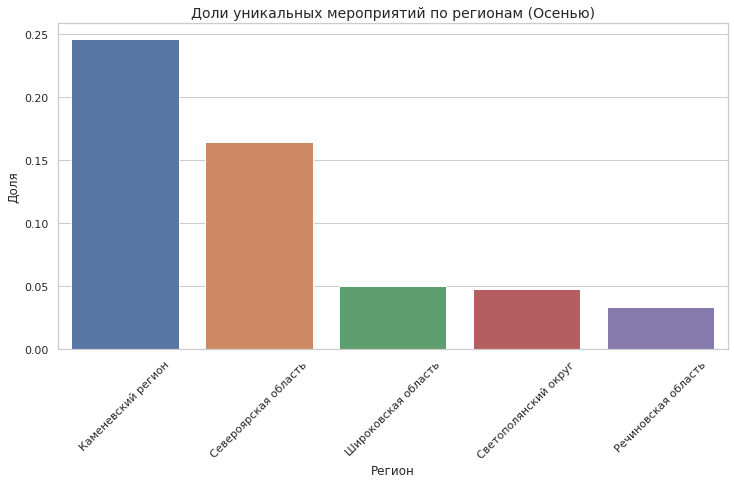

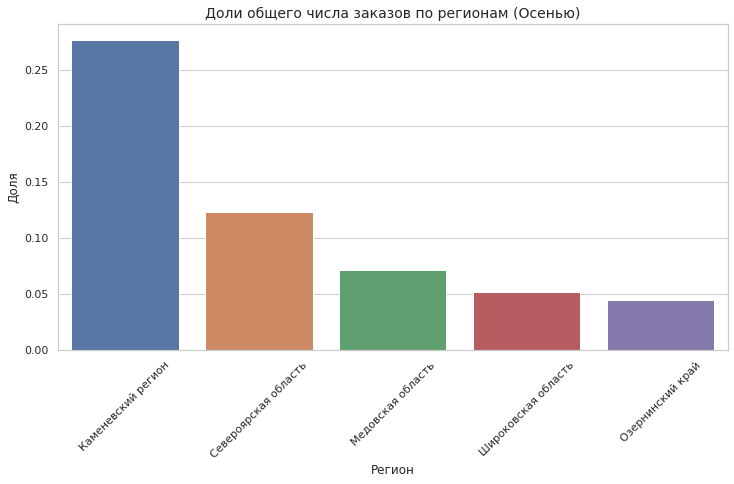

In [31]:
# Считаем уникальные мероприятия и общее число заказов для каждого региона ОСЕНЬЮ
region_events = df_autumn.groupby('region_name')['event_id'].nunique().reset_index()
region_events.columns = ['region_name', 'unique_events']

region_orders = df_autumn.groupby('region_name')['order_id'].count().reset_index()
region_orders.columns = ['region_name', 'total_orders']

# Объединение данных
region_analysis = region_events.merge(region_orders, on='region_name')

# Расчёт долей
region_analysis['event_share'] = region_analysis['unique_events'] / region_analysis['unique_events'].sum()
region_analysis['order_share'] = region_analysis['total_orders'] / region_analysis['total_orders'].sum()

# ТОП-5 регионов по уникальному количеству мероприятий
top_regions_by_events = region_analysis.sort_values(by='unique_events', ascending=False).head(5)

# ТОП-5 регионов по общему числу заказов
top_regions_by_orders = region_analysis.sort_values(by='total_orders', ascending=False).head(5)

# Отображаем долю уникальных мероприятий по регионам
display(top_regions_by_events[['region_name', 'event_share']])

# Отображаем долю общего числа заказов по регионам
display(top_regions_by_orders[['region_name', 'order_share']])

# Визуализируем долю уникальных мероприятий по регионам
plt.figure(figsize=(12, 6))
sns.barplot(x='region_name', y='event_share', data=top_regions_by_events)
plt.title('Доли уникальных мероприятий по регионам (Осенью)', fontsize=14)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Доля', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Визуализируем долю общего числа заказов по регионам
plt.figure(figsize=(12, 6))
sns.barplot(x='region_name', y='order_share', data=top_regions_by_orders)
plt.title('Доли общего числа заказов по регионам (Осенью)', fontsize=14)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Доля', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Топ-3 региона по меропритиям и числу заказов это Каменевский регион, Североярская область и Широковская область далее результаты разняться по мероприятиям дальше идут Светополянский округ и Речиновская область, а по общему числу заказов Медовская область и Озернинский край. Причем первые 2 региона ( Каменевский регион и Североярская область) идут с большим отрывом от остальных регионов.

__3.3.2 Считаем общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов для каждого билетного партнера__

Доли уникальных мероприятий по партерам:


,service_name,unique_events,total_orders,total_revenue,event_share,order_share,revenue_share
21,Лови билет!,4867,40802,16675475.08,0.199590,0.141796,0.111720
3,Билеты без проблем,4247,62858,24322192.40,0.174164,0.218446,0.162951
5,Билеты в руки,3530,40280,13194290.57,0.144761,0.139982,0.088397
25,Облачко,2335,26402,18588613.86,0.095756,0.091753,0.124538
22,Лучшие билеты,1762,17741,2724060.58,0.072258,0.061654,0.018250


Доли обработанных заказов по партнерам:


,service_name,unique_events,total_orders,total_revenue,event_share,order_share,revenue_share
3,Билеты без проблем,4247,62858,24322192.40,0.174164,0.218446,0.162951
21,Лови билет!,4867,40802,16675475.08,0.199590,0.141796,0.111720
5,Билеты в руки,3530,40280,13194290.57,0.144761,0.139982,0.088397
24,Мой билет,1300,34440,22042364.72,0.053311,0.119687,0.147677
25,Облачко,2335,26402,18588613.86,0.095756,0.091753,0.124538


Доли суммарной выручки с заказанных билетов по партнерам:


,service_name,unique_events,total_orders,total_revenue,event_share,order_share,revenue_share
3,Билеты без проблем,4247,62858,24322192.40,0.174164,0.218446,0.162951
24,Мой билет,1300,34440,22042364.72,0.053311,0.119687,0.147677
25,Облачко,2335,26402,18588613.86,0.095756,0.091753,0.124538
21,Лови билет!,4867,40802,16675475.08,0.199590,0.141796,0.111720
8,Весь в билетах,855,16425,16533231.19,0.035063,0.057081,0.110767


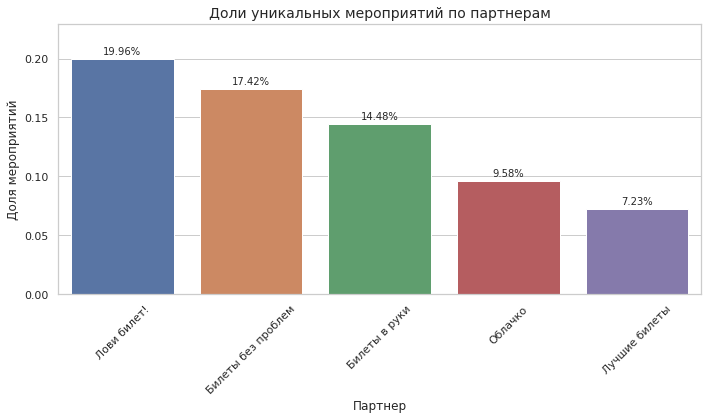

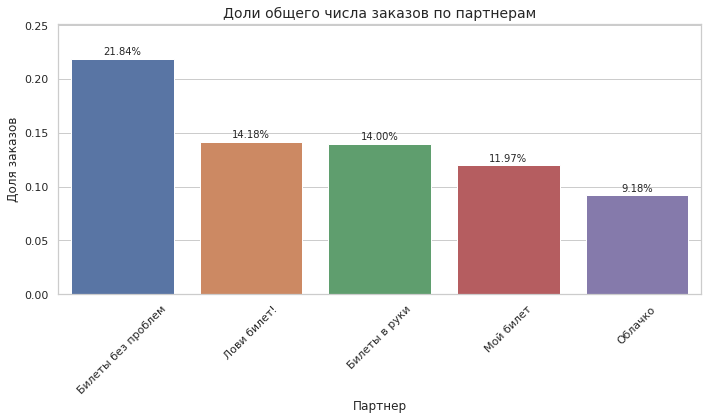

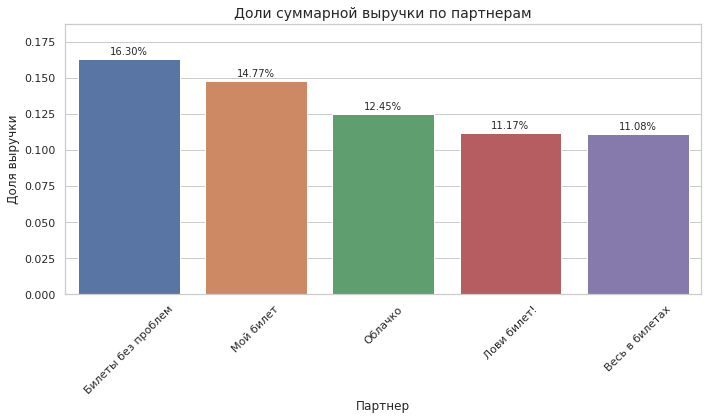

In [32]:
# Группировка данных по каждому сервисному партнеру
partner_events = df.groupby('service_name')['event_id'].nunique().reset_index()
partner_events.columns = ['service_name', 'unique_events']

partner_orders = df.groupby('service_name')['order_id'].count().reset_index()
partner_orders.columns = ['service_name', 'total_orders']

partner_revenue = df.groupby('service_name')['revenue_rub'].sum().reset_index()
partner_revenue.columns = ['service_name', 'total_revenue']

# Объединение всех метрик
partner_analysis = (
    partner_events
    .merge(partner_orders, on='service_name')
    .merge(partner_revenue, on='service_name')
)

# Рассчет долей
partner_analysis['event_share'] = partner_analysis['unique_events'] / partner_analysis['unique_events'].sum()
partner_analysis['order_share'] = partner_analysis['total_orders'] / partner_analysis['total_orders'].sum()
partner_analysis['revenue_share'] = partner_analysis['total_revenue'] / partner_analysis['total_revenue'].sum()

# Округление общей выручки для лучшего восприятия
partner_analysis['total_revenue'] = partner_analysis['total_revenue'].round(2)

# Получение топ-5 партнеров по уникальным мероприятиям
top_partners_by_events = partner_analysis.sort_values(by='unique_events', ascending=False).head(5)

# Получение топ-5 партнеров по общим заказам
top_partners_by_orders = partner_analysis.sort_values(by='total_orders', ascending=False).head(5)

# Получение топ-5 партнеров по общей выручке
top_partners_by_revenue = partner_analysis.sort_values(by='total_revenue', ascending=False).head(5)

# Вывод долей по различным показателям с помощью display()

print("Доли уникальных мероприятий по партерам:")
display(top_partners_by_events)

print("Доли обработанных заказов по партнерам:") 
display(top_partners_by_orders)

print("Доли суммарной выручки с заказанных билетов по партнерам:") 
display(top_partners_by_revenue)

# Вспомогательная функция для построения графика
def plot_share(data, value_column, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='service_name', y=value_column, data=data)
    plt.title(title, fontsize=14)
    plt.xlabel('Партнер', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    
    # Надпись сверху барчартов с долями
    for i, value in enumerate(data[value_column]):
        plt.text(i, value + 0.002, f"{value:.2%}", ha='center', va='bottom', fontsize=10)
        
    plt.ylim(0, data[value_column].max() * 1.15)
    plt.tight_layout()
    plt.show()

# Построение трех графиков
plot_share(top_partners_by_events, 'event_share', 'Доли уникальных мероприятий по партнерам', 'Доля мероприятий')
plot_share(top_partners_by_orders, 'order_share', 'Доли общего числа заказов по партнерам', 'Доля заказов')
plot_share(top_partners_by_revenue, 'revenue_share', 'Доли суммарной выручки по партнерам', 'Доля выручки')

__Анализ данных показал, что среди партнёров выделяются несколько ключевых игроков, которые вносят наибольший вклад в количество уникальных мероприятий, общее число заказов и суммарную выручку.__

- Топ-5 партнёров по количеству уникальных мероприятий

Лови билет!: 4882 уникальных мероприятия, доля 19.95%.
Билеты без проблем: 4255 уникальных мероприятий, доля 17.39%.
Билеты в руки: 3538 уникальных мероприятий, доля 14.46%.
Облачко: 2348 уникальных мероприятий, доля 9.60%.
Лучшие билеты: 1762 уникальных мероприятия, доля 7.20%.

- Топ-5 партнёров по общему числу заказов

Билеты без проблем: 63506 заказов, доля 21.85%.
Лови билет!: 41120 заказов, доля 14.15%.
Билеты в руки: 40337 заказов, доля 13.88%.
Мой билет: 34836 заказов, доля 11.99%.
Облачко: 26642 заказов, доля 9.17%.

- Топ-5 партнёров по суммарной выручке

Билеты без проблем: 26,701,650 рублей, доля 16.54%.
Мой билет: 23,476,850 рублей, доля 14.54%.
Облачко: 21,644,070 рублей, доля 13.41%.
Весь в билетах: 18,049,300 рублей, доля 11.18%.
Лови билет!: 17,664,990 рублей, доля 10.94%.

Таким образом по всем выборкам выделяются 3 партнера: Лови билет, Билеты без проблем и Облачко.

# 4. Статистический анализ данных.

In [33]:
# Фильтрация данных за осенний период
df_autumn = df[(df['month'] >= 9) & (df['month'] <= 10)]

In [34]:
# Проверим пользователей, которые присутствуют в обеих группах
common_users = set(df_autumn[df_autumn['device_type_canonical'] == 'mobile']['user_id']) & set(df_autumn[df_autumn['device_type_canonical'] == 'desktop']['user_id'])

print(f"Количество пользователей, которые присутствуют в обеих группах: {len(common_users)}")

# Найти общее количество уникальных пользователей
total_users = df_autumn['user_id'].nunique()
print(f"Общее количество уникальных пользователей: {total_users}")

# Рассчитываем долю пересекающихся пользователей
common_users_count = len(common_users)
common_users_share = common_users_count / total_users

print(f"Доля пересекающихся пользователей: {common_users_share:.2%}")

Количество пользователей, которые присутствуют в обеих группах: 3249
Общее количество уникальных пользователей: 15811
Доля пересекающихся пользователей: 20.55%


__Удалим пересечения пользователей, которые присутствуют в обеих группах (мобильные и стационарные устройства), чтобы обеспечить независимость выборок. Это поможет получить более точные результаты.__

In [35]:
# Исключение пересекающихся пользователей
df_filtered = df_autumn[df_autumn['user_id'].isin(common_users)]

In [36]:
# Повторение анализа с фильтрованными данными
mobile_orders_per_user_filtered = df_autumn[df_autumn['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count()
desktop_orders_per_user_filtered = df_autumn[df_autumn['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count()

In [37]:
# Кол-во заказов
user_orders = df_filtered.groupby(['user_id', 'device_type_canonical'])['order_id'].count().reset_index()
user_orders.columns = ['user_id', 'device', 'orders_count']

# Среднее время между заказами 
user_days = df_filtered.query('days_since_prev > 0').groupby(['user_id', 'device_type_canonical'])['days_since_prev'].mean().reset_index()
user_days.columns = ['user_id', 'device', 'avg_days_between']

In [38]:
# Объединяем
user_stats = pd.merge(user_orders, user_days, on=['user_id', 'device'])

# Переименуем device_type_canonical в 'device' для удобства графиков
user_stats.rename(columns={'device_type_canonical': 'device'}, inplace=True)

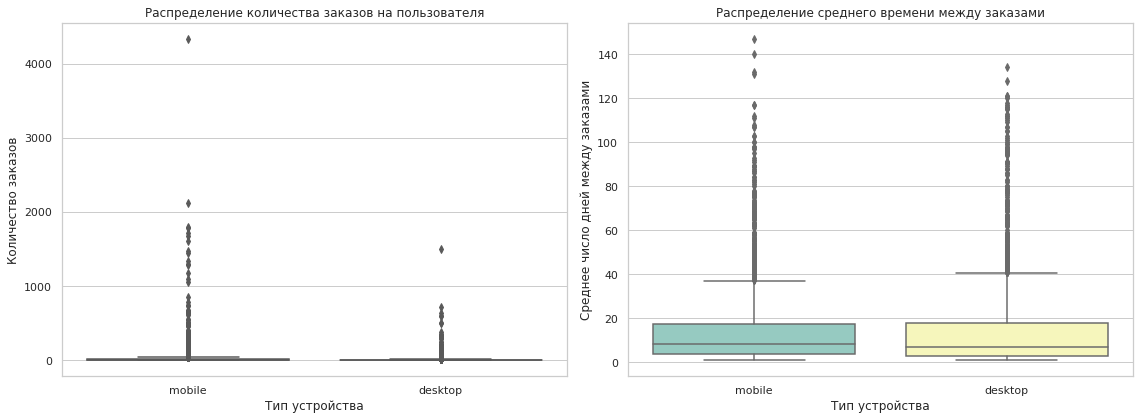

In [39]:
# Визуализация: boxplot для количества заказов и среднего времени между заказами
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=user_stats, x='device', y='orders_count', ax=axes[0], palette="Set2")
axes[0].set_title("Распределение количества заказов на пользователя")
axes[0].set_xlabel("Тип устройства")
axes[0].set_ylabel("Количество заказов")

sns.boxplot(data=user_stats, x='device', y='avg_days_between', ax=axes[1], palette="Set3")
axes[1].set_title("Распределение среднего времени между заказами")
axes[1].set_xlabel("Тип устройства")
axes[1].set_ylabel("Среднее число дней между заказами")

plt.tight_layout()
plt.show()

In [40]:
# from scipy.stats import shapiro

Тест Шапиро-Уилка  
Цель: проверить, соответствуют ли наши данные нормальному распределению.  
H₀: Данные распределены нормально.  
H₁: Данные не распределены нормально.

In [41]:
shapiro_mobile_orders = shapiro(user_stats[user_stats.device == 'mobile']['orders_count']).pvalue
shapiro_desktop_orders = shapiro(user_stats[user_stats.device == 'desktop']['orders_count']).pvalue

shapiro_mobile_time = shapiro(user_stats[user_stats.device == 'mobile']['avg_days_between'].dropna()).pvalue
shapiro_desktop_time = shapiro(user_stats[user_stats.device == 'desktop']['avg_days_between'].dropna()).pvalue

print(f"Shapiro — количество заказов: mobile={shapiro_mobile_orders:.4f}, desktop={shapiro_desktop_orders:.4f}")
print(f"Shapiro — дни между заказами: mobile={shapiro_mobile_time:.4f}, desktop={shapiro_desktop_time:.4f}")

Shapiro — количество заказов: mobile=0.0000, desktop=0.0000
Shapiro — дни между заказами: mobile=0.0000, desktop=0.0000


__Тест Шапиро-Уилка (на нормальность):__  
- p-value = 0.0000 (и для мобильных, и для десктопных, и по количеству заказов, и по времени между заказами)  
Это очень маленькое значение, значит данные НЕ распределены нормально — они не похожи на "классическую колоколообразную" кривую.

Тест Левена   
Цель: Проверка однородности дисперсий между группами (например, мобильные и десктопные устройства).  
H₀: Дисперсии в сравниваемых группах одинаковы.  
H₁: Дисперсии в сравниваемых группах различаются.

In [43]:
levene_orders = levene(
    user_stats[user_stats.device == 'mobile']['orders_count'],
    user_stats[user_stats.device == 'desktop']['orders_count']
).pvalue

levene_days = levene(
    user_stats[user_stats.device == 'mobile']['avg_days_between'].dropna(),
    user_stats[user_stats.device == 'desktop']['avg_days_between'].dropna()
).pvalue

print(f"Levene — дисперсия заказов: {levene_orders:.4f}")
print(f"Levene — дисперсия дней: {levene_days:.4f}")

Levene — дисперсия заказов: 0.0000
Levene — дисперсия дней: 0.0094


__Тест Левена (на равенство дисперсий):__

- Для количества заказов: p-value = 0.0000 — значит дисперсии в группах разные, то есть разброс заказов по мобильным и десктопным пользователям существенно отличается.
- Для времени между заказами: p-value = 0.0083 — это меньше 0.05, значит дисперсии не равны (есть существенная разница в разбросе времени между заказами в группах).


__Выбираем тест Манна–Уитни, потому что:__

- выборки независимы;
- выборки разного размера;
- данные не похожи на нормальное распределение и содержат выбросы

Манна–Уитни хорошо работает в таких условиях

__Гипотеза 1: количество заказов__  

H₀: среднее число заказов на одного пользователя с мобильного устройства не выше, чем у десктопа.  
H₁: среднее число заказов на одного пользователя с мобильного устройства не ниже, чем у десктопа.


In [45]:
stat_orders, p_orders = mannwhitneyu(
    user_stats[user_stats.device == 'mobile']['orders_count'],
    user_stats[user_stats.device == 'desktop']['orders_count'],
    alternative='greater'  # потому что H1: "мобильные не ниже"
)

print(f"\nГипотеза 1 (кол-во заказов): U = {stat_orders:.2f}, p = {p_orders:.4f}")


Гипотеза 1 (кол-во заказов): U = 6155365.00, p = 0.0000


__Гипотеза 2: время между заказами__  

H₀: среднее время между заказами у пользователей мобильного приложения не выше, чем у десктопа.   
H₁: среднее время между заказами у мобильных пользователей не ниже, чем у десктопа.

In [46]:
stat_days, p_days = mannwhitneyu(
    user_stats[user_stats.device == 'mobile']['avg_days_between'].dropna(),
    user_stats[user_stats.device == 'desktop']['avg_days_between'].dropna(),
    alternative='greater'  # H1: "время не ниже"
)

print(f"Гипотеза 2 (время между заказами): U = {stat_days:.2f}, p = {p_days:.4f}")


Гипотеза 2 (время между заказами): U = 4759720.00, p = 0.0000


In [47]:
alpha = 0.05

print("Интерпретация результатов:")

# Гипотеза 1: количество заказов
if p_orders < alpha:
    print("Гипотеза 1: ОТВЕРГАЕМ H₀ — пользователи мобильного приложения совершают не меньше заказов, чем пользователи десктопа.")
else:
    print("Гипотеза 1: НЕ отвергаем H₀ — недостаточно доказательств, что мобильные делают больше заказов.")

# Гипотеза 2: время между заказами
if p_days < alpha:
    print("Гипотеза 2: ОТВЕРГАЕМ H₀ — среднее время между заказами у мобильных пользователей больше (то есть, они заказывают реже).")
else:
    print("Гипотеза 2: НЕ отвергаем H₀ — нет статистической разницы во времени между заказами.")

Интерпретация результатов:
Гипотеза 1: ОТВЕРГАЕМ H₀ — пользователи мобильного приложения совершают не меньше заказов, чем пользователи десктопа.
Гипотеза 2: ОТВЕРГАЕМ H₀ — среднее время между заказами у мобильных пользователей больше (то есть, они заказывают реже).


__Гипотеза 1 — Количество заказов__
Что проверяли: делают ли мобильные пользователи не меньше заказов, чем десктопные?
Результат: да, делают не меньше.
Вывод: мобильное приложение работает хорошо — люди активно покупают с телефонов.

__Гипотеза 2 — Время между заказами__
Что проверяли: заказывают ли мобильные пользователи чаще (с меньшими перерывами)?
Результат: наоборот — у них больше паузы между заказами.
Вывод: мобильные пользователи заказывают реже, чем десктопные, хоть и не меньше в целом.

# 5. Выводы и рекомендации

__Общий вывод:__  

В ходе анализа использованы данные по заказам билетов на мероприятия c июня по октярь 2024 года, объединённые из трёх источников (заказы, события и курсы валют).  

- Были проведены этапы предобработки, включая очистку, фильтрацию выбросов и преобразование валют.  
- Анализ охватывал сезонные изменения, распределение по категориям мероприятий, активности пользователей, регионы и партнёров.  
- Сделана статистическая проверка гипотез по активности мобильных и десктопных пользователей.  


__Основные результаты анализа:__

__Сезонность и популярность мероприятий:__. 
- Количество заказов растёт с июня к октябрю с пиком в октябре. Лидируют концерты, но их популярность осенью немного снижается, тогда как театральные мероприятия и спорт набирают обороты. Средняя стоимость билетов в большинстве категорий осенью падает (концерты, театры, спорт, ёлки), кроме выставок и стендапа, где цена растёт.  

__Пользовательская активность:__  
- В начале сентября наблюдается резкий рост числа заказов и активных пользователей, что предположительно связано с началом учебного года и окончанием отпускного периода. В эти дни падает средняя стоимость билетов, возможно из-за акций и скидок.  

__Дни недели:__  
- Пиковая активность приходится на вторник, четверг и пятницу, когда пользователи планируют посещение мероприятий на выходных. В выходные активность снижается.

__Регионы и партнёры:__. 
- Явными лидерами по количеству мероприятий и заказов являются Каменевский регион и Североярская область. Топ-партнёры, обеспечивающие значительный объём продаж и мероприятий — «Лови билет», «Билеты без проблем» и «Облачко».

__Результаты проверки гипотез:__  
- Мобильные пользователи делают не меньше заказов, чем десктопные, что подтверждает эффективность мобильного приложения. Однако интервал между заказами у мобильных пользователей больше, то есть они заказывают реже, хотя и не менее активно в целом.



__Рекомендации:__
1. Усилить маркетинг в сентябре и в середине недели (вторник–пятница), используя акции и специальные предложения, так как в эти периоды наблюдается пик активности. 

2. Особое внимание уделить мобильным пользователям:
- Разработать механизмы стимулирования более частых покупок через мобильное приложение (например, программы лояльности, персональные напоминания, спецпредложения).  
- Анализировать поведение пользователей, чтобы повысить их регулярность заказов.

3. Фокусироваться на ключевых регионах и партнёрах:  
- Поддерживать и развивать сотрудничество с топ-регионами (Каменевский регион, Североярская область).  
- Укреплять партнёрские отношения с лидерами по продажам («Лови билет», «Билеты без проблем», «Облачко»), чтобы расширять охват и ассортимент мероприятий.  
- Следить за сезонными изменениями и адаптировать ассортимент мероприятий с учётом изменений в интересах аудитории.  - Мониторить дни недели и распределять маркетинговые кампании с учётом активности пользователей, чтобы максимально эффективно использовать пиковые дни.

4. Продолжать сбор и анализ данных с целью мониторинга динамики и выявления новых тенденций.
